In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
dataset = pd.read_csv("/home/yadhu/MEGA/ML TUTORIALS/LINEAR REGRESSION/car_purchasing .csv",encoding='ISO-8859-1')

In [6]:
dataset.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [7]:
dataset.isna().sum()

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

In [8]:
dataset.duplicated().sum()

0

In [9]:
dataset.corr()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
gender,1.000000,-0.064481,-0.036499,0.024193,-0.008395,-0.066408
age,-0.064481,1.000000,0.000130,0.034721,0.020356,0.632865
annual Salary,-0.036499,0.000130,1.000000,0.049599,0.014767,0.617862
credit card debt,0.024193,0.034721,0.049599,1.000000,-0.049378,0.028882
net worth,-0.008395,0.020356,0.014767,-0.049378,1.000000,0.488580
car purchase amount,-0.066408,0.632865,0.617862,0.028882,0.488580,1.000000


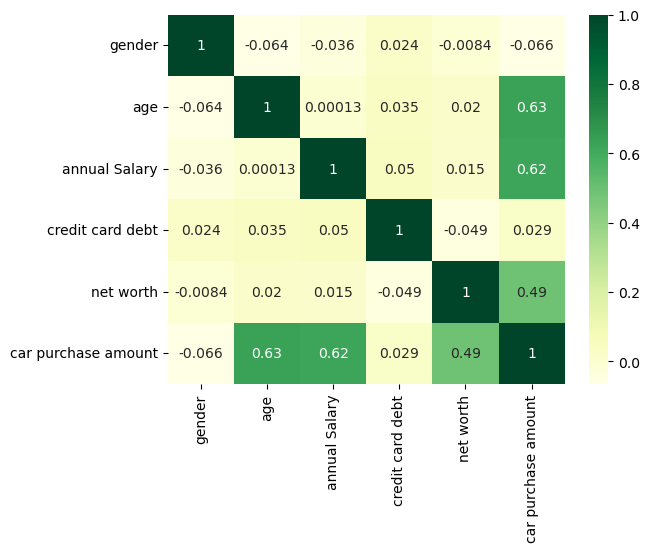

In [10]:
import seaborn as sb
dataplot = sb.heatmap(dataset.corr(),cmap="YlGn",annot=True)
plt.show()

In [11]:
dataset = dataset.drop(['customer name','customer e-mail','country','gender','credit card debt'],axis=1)

In [12]:
dataset

,age,annual Salary,net worth,car purchase amount
0,41.851720,62812.09301,238961.2505,35321.45877
1,40.870623,66646.89292,530973.9078,45115.52566
2,43.152897,53798.55112,638467.1773,42925.70921
3,58.271369,79370.03798,548599.0524,67422.36313
4,57.313749,59729.15130,560304.0671,55915.46248
...,...,...,...,...
495,41.462515,71942.40291,541670.1016,48901.44342
496,37.642000,56039.49793,360419.0988,31491.41457
497,53.943497,68888.77805,764531.3203,64147.28888
498,59.160509,49811.99062,337826.6382,45442.15353


In [13]:
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=0)

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train[:,:])
x_test = sc.transform(x_test[:,:])

In [16]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)


LinearRegression()

In [17]:
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

In [18]:
from sklearn.metrics import mean_squared_error,r2_score
mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)
print("MSE of train : ",mse_train)
print("MSE of test : ",mse_test)
r2_train = r2_score(y_train,y_train_pred)
r2_test = r2_score(y_test,y_test_pred)
print("r square of train : ",r2_train)
print("r square of test : ",r2_test)

MSE of train :  2.102269103605293
MSE of test :  2.496927941606077
r square of train :  0.9999999816483821
r square of test :  0.9999999792688712


In [19]:
adj_r2_train = 1-((1-r2_train)*(len(y)-1)/(len(y)-x.shape[1]-1))
adj_r2_test = 1-((1-r2_test)*(len(y)-1)/(len(y)-x.shape[1]-1))
print("adjusted r2 of train : ",adj_r2_train)
print("adjusted r2 of test : ",adj_r2_test)

adjusted r2 of train :  0.9999999815373845
adjusted r2 of test :  0.9999999791434813


In [20]:
lr.coef_

array([6732.60447501, 6585.90151071, 5027.32238754])

In [21]:
lr.intercept_

44054.399964774944